# Visualizations for LAMMPS Tutorial
### Based on: [https://lammpstutorials.github.io/sphinx/build/html/tutorials/level2/polymer-in-water.html](https://lammpstutorials.github.io/sphinx/build/html/tutorials/level2/polymer-in-water.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lammps_logfile as lammps

plt.rc('font',family = 'serif')
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
! ls

dump.lammpstrj			output-temperature.dat	VACF-init.dat
input.lammps			PEG-H2O-final.dat	vis.ipynb
log.lammps			PEG-H2O-initial.dat	vmdscene.pyg
MSD-final.dat			PEGinH2O.mpg		vmdscene.tga
MSD-init.dat			PEGinH2O_.mpg
output-end-to-end-distance.dat	VACF-final.dat


In [3]:
distance = pd.read_csv("output-end-to-end-distance.dat", skiprows=2, sep="\s", engine='python', header=None) 
distance.columns = ["TimeStep", "distance"] # units are fs and Ångstroms^-3, respectively


(0.0, 6.0)

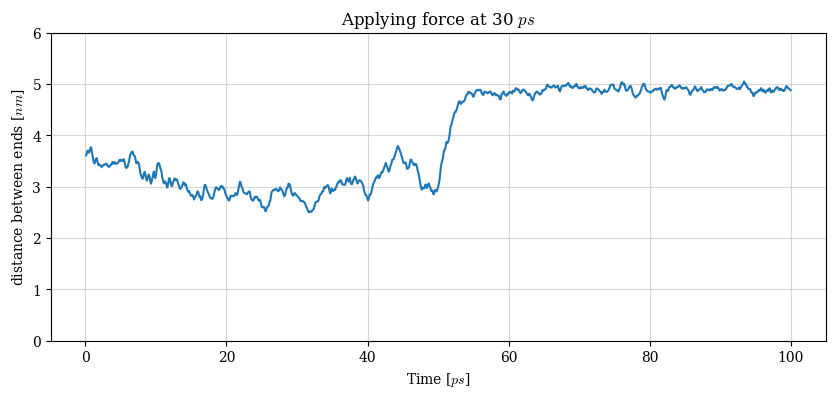

In [4]:

plt.figure(figsize=(10,4))
plt.plot(distance["TimeStep"]/1000, distance["distance"]/10)
plt.xlabel("Time [$ps$]")
plt.ylabel("distance between ends [$nm$]")
plt.grid(alpha=0.5)
plt.title("Applying force at 30 $ps$")

ax = plt.gca()
ax.set_ylim([0, 6])

In [5]:
!ls

dump.lammpstrj			output-temperature.dat	VACF-init.dat
input.lammps			PEG-H2O-final.dat	vis.ipynb
log.lammps			PEG-H2O-initial.dat	vmdscene.pyg
MSD-final.dat			PEGinH2O.mpg		vmdscene.tga
MSD-init.dat			PEGinH2O_.mpg
output-end-to-end-distance.dat	VACF-final.dat


In [6]:
colsRDF = pd.read_csv("PEG-H2O-initial.dat", skiprows=2, sep="\s", engine='python', header=None).loc[0][1::]
RDF_init =  pd.read_csv("PEG-H2O-initial.dat", skiprows=4, sep="\s", engine='python', header=None)
RDF_init.columns = list(colsRDF)
RDF_init

,Row,c_RDF_PEG_H2O[1],c_RDF_PEG_H2O[2],c_RDF_PEG_H2O[3],c_RDF_PEG_H2O[4],c_RDF_PEG_H2O[5]
0,1,0.025,0.000000,0.000,0.000000,0.000
1,2,0.075,0.000000,0.000,0.000000,0.000
2,3,0.125,0.000000,0.000,0.000000,0.000
3,4,0.175,0.000000,0.000,0.000000,0.000
4,5,0.225,0.000000,0.000,0.000000,0.000
...,...,...,...,...,...,...
396,196,9.775,0.986938,111.079,0.995254,111.499
397,197,9.825,0.991934,112.898,0.993182,113.320
398,198,9.875,0.998388,114.748,0.990364,115.155
399,199,9.925,0.994448,116.609,0.994689,117.016


### COLUMN MEANING:

INPUT:  `compute RDF_PEG_H2O all rdf 200 1 8 2 8 cutoff 10`

* `Row`: This is the row number or bin index. Each row corresponds to a different distance bin for the RDF. 
* `c_RDF_PEG_H2O[1]`: $r$, the position -- how far away from the center of the particle you are, here in Å
* `c_RDF_PEG_H2O[2]`: RDF H $_2$ O and PEG (Type 1 is Oxygen from the PEG and type 8 is Oxygen from water)
* `c_RDF_PEG_H2O[3]`: Cumulative radial distribution function of the previous columns
* `c_RDF_PEG_H2O[4]`: RDF H $_2$ O and PEG (Type 2 is Carbon from the PEG and type 8 is Oxygen from water) 
* `c_RDF_PEG_H2O[5]`: Cumulative radial distribution function of the previous columns

In [9]:
RDF_init.columns = ["bin", "distance", "RDF_OO", "CDF_OO", "RDF_CO", "CDF_CO"]

RDF_finl = pd.read_csv("PEG-H2O-final.dat", skiprows=4, sep="\s", engine='python', header=None)
RDF_finl.columns = ["bin", "distance", "RDF_OO", "CDF_OO", "RDF_CO", "CDF_CO"]


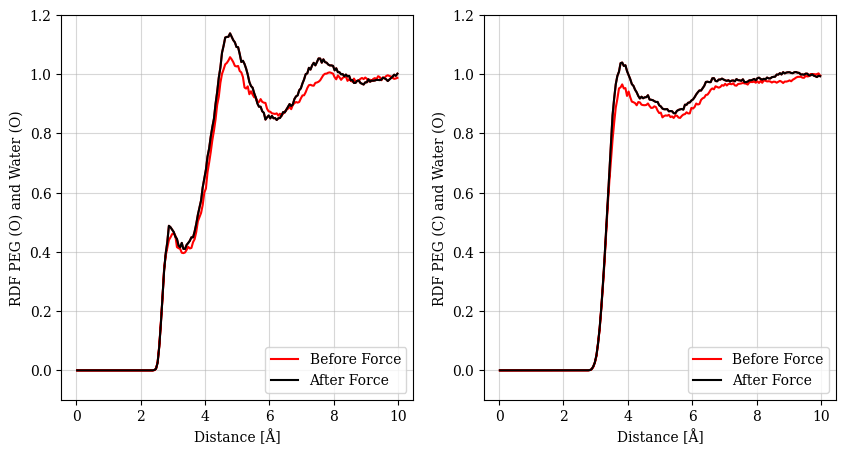

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(RDF_init["distance"], RDF_init["RDF_OO"], c="red", label = "Before Force")
ax[0].plot(RDF_finl["distance"], RDF_finl["RDF_OO"], c="black", label = "After Force")
ax[0].set_xlabel("Distance [Å]")
ax[0].set_ylabel("RDF PEG (O) and Water (O)")
ax[0].legend(loc="lower right")
ax[0].set_ylim([-0.1, 1.2])
ax[0].grid(alpha=0.5)

ax[1].plot(RDF_init["distance"], RDF_init["RDF_CO"], c="red", label = "Before Force")
ax[1].plot(RDF_finl["distance"], RDF_finl["RDF_CO"], c="black", label = "After Force")
ax[1].set_xlabel("Distance [Å]")
ax[1].set_ylabel("RDF PEG (C) and Water (O)")
ax[1].legend(loc="lower right")
ax[1].set_ylim([-0.1, 1.2])
ax[1].grid(alpha=0.5)

plt.show()

RDF: fluctuations around the average of particle numbers at certain distances. Average should always be one. For distances are nearly overlapping, you will not find a particle. For distances at around 4.5 Å for Oxygen-Oxygen, we observe a huge peak, where it is most likely to find the other particle.Whereas for the Carbon-Oxygen, the main distance is around 3.8 Å.

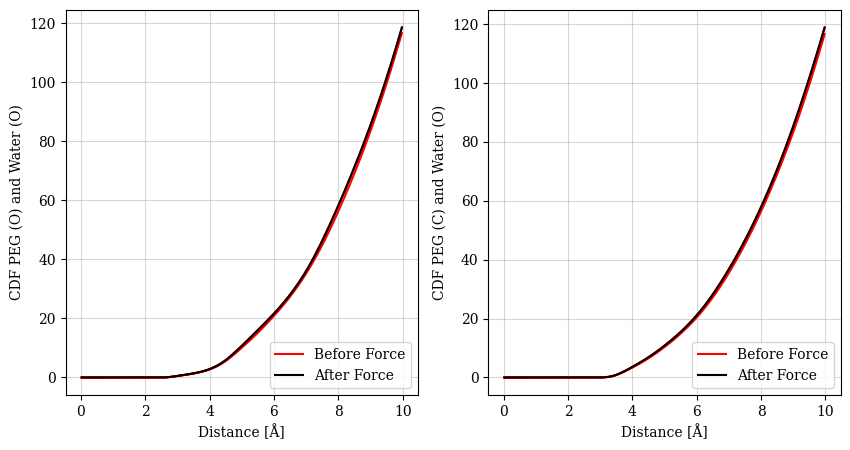

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(RDF_init["distance"], RDF_init["CDF_OO"], c="red", label = "Before Force")
ax[0].plot(RDF_finl["distance"], RDF_finl["CDF_OO"], c="black", label = "After Force")
ax[0].set_xlabel("Distance [Å]")
ax[0].set_ylabel("CDF PEG (O) and Water (O)")
ax[0].legend(loc="lower right")
ax[0].grid(alpha=0.5)

ax[1].plot(RDF_init["distance"], RDF_init["CDF_CO"], c="red", label = "Before Force")
ax[1].plot(RDF_finl["distance"], RDF_finl["CDF_CO"], c="black", label = "After Force")
ax[1].set_xlabel("Distance [Å]")
ax[1].set_ylabel("CDF PEG (C) and Water (O)")
ax[1].legend(loc="lower right")
ax[1].grid(alpha=0.5)

plt.show()